# Линейная алгебра: сходство текстов и аппроксимация функций


## Задача 1: сравнение предложений

Подключим все необходимые библиотеки

In [1]:
import re
import numpy as np
from scipy import spatial as sp

Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().

In [9]:
file = open("sentences.txt")
lines = list(file)
data =[]
for text_line in lines:
    text_line = text_line.strip()    
    text_line = text_line.lower()
    data.append(text_line)
file.close()

Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.

In [10]:
for i in range(len(data)):
    data[i] = re.split('[^a-z]', data[i])
    for j in range(data[i].count('')):
        data[i].remove('')

Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.

In [11]:
diction = {}
count = 0
for words in data:
    for word in words:
        if not (word in diction.keys()):
            diction[word] = count
            count += 1

Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.

In [12]:
matrix = np.zeros((len(data), len(diction)))
for i in range(len(data)):
    for j in range(len(diction)):
        Item = ()
        for item in diction.items():
            if item[1] == j:
                Item = item
                break
        matrix[i][j] = data[i].count(Item[0])

Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.

In [14]:
min1 = (0, 1) 
min2 = (0, 1)
shape = matrix.shape
for i in range(1, shape[0]):
    cosin = sp.distance.cosine(matrix[0], matrix[i])
    if (cosin < min1[1]):
        min2 = min1
        min1 = (i, cosin)
    elif (cosin < min2[1]):
        min2 = (i, cosin)
print(min1, min2, sep='\n')

(6, 0.7327387580875756)
(4, 0.7770887149698589)


## Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Подключим все необходимые библиотеки

In [24]:
%matplotlib inline
import numpy as np
import scipy as sp
import math as math
from matplotlib import pylab as plt

Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен.

[[3.25221687]
 [0.63522142]]


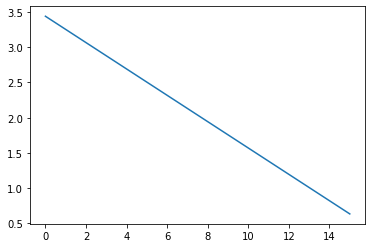

[[ 3.43914511]
 [-0.18692825]]


In [25]:
C = np.array([1, 15])
def f(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)
B = np.array([[f(C[0])], [f(C[1])]])
print(B)
a = np.array([[1, C[0]], [1, C[1]]])
w = np.linalg.solve(a, B)
x = np.arange(0., 15.1, 0.1)
y = w[0] + w[1]*x 
plt.plot(x, y)
plt.show()
print(w)

Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15.

In [26]:
C = np.array([1, 8, 15])
def f(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)
B = np.array([[f(C[0])], [f(C[1])], [f(C[2])]])
print(B)
a = np.array([[1, C[0], C[0]**2, [1, C[1], C[1]**2], [1, C[2], C[2]**2]]])
w = np.linalg.solve(a, B)
x = np.arange(0., 15.1, 0.1)
y = w[0] + w[1]*x + w[2]*(x**2) 
print(w)
plt.plot(x, y)
plt.show()

[[3.25221687]
 [2.31617016]
 [0.63522142]]


LinAlgError: Last 2 dimensions of the array must be square